In [1]:
import MLTSA

In [2]:
dir(MLTSA)

['MLTSA_datasets',
 'MLTSA_plot_sk',
 'MLTSA_plot_tf',
 'MLTSA_skl',
 'MLTSA_sklearn',
 'MLTSA_tensorflow',
 'MLTSA_tfl',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'build_LSTM_tf',
 'build_MLP_tf',
 'build_RNN_tf',
 'datasets',
 'mlp_sk']

In [5]:
help(MLTSA.datasets.two_d_generate_traj)

Help on function generate_traj in module MLTSA.MLTSA_datasets.TwoD_pot.TwoD_pot_data:

generate_traj(type, number=100, visual=False, help=False)
    generate_traj A meta function that use for generating traj data, simply wrapped I/O of gemerateTraj class
    
    :param type: pattern code of potential, indicating type of potential to generate traj on, including s2, s3 and z
    :type type: str
    :param number: number of trajs to be generated at once, defaults to 100
    :type number: int, optional
    :param visual: boolean value indicating plot the result of generated trajs or not, defaults to False
    :type visual: bool, optional
    :param help: boolean value indicating show the help information from generateTraj calss or not, defaults to False
    :type help: bool, optional
    :raises ValueError: indicating the user input not match pre-set potential parrtern code, should be z, s2 or s3
    
    :return: An array containing all the traj data in shape of (traj_index, dim_index(x 

Some useful functions has been defined in ahead, set help=True for details


100%|██████████| 100/100 [00:12<00:00,  7.74it/s]


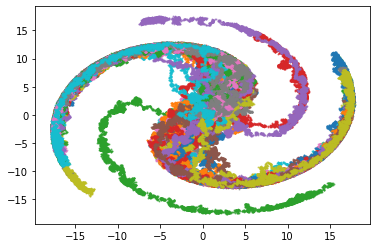

In [6]:
spiral_2b_raw = MLTSA.datasets.two_d_generate_traj('s2', 100, True)

In [7]:
s2_processor = MLTSA.datasets.two_d_data_processor('s2')

In [8]:
help(MLTSA.datasets.two_d_data_process_full)

Help on function data_process_full in module MLTSA.MLTSA_datasets.TwoD_pot.TwoD_pot_data:

data_process_full(obj, raw_data, fsize, visual=False)
    data_process_full Process the generated raw traj data until balanced level
    
    :param obj: DataProcess obeject generated by data_processor function
    :type obj: DataProcess object
    :param raw_data: unprocessed traj data,  in shape of (n_traj, n_dim, n_step)
    :type raw_data: numpy array
    :param fsize: number of trajs in each class final produced, should be changed wrt raw_data length
    :type fsize: int
    :return: balance_data, balance_labels, processed data and corresponding labels
    :rtype: numpy array, numpy array



In [11]:
s2_trajs, s2_labels = MLTSA.datasets.two_d_data_process_full(s2_processor, spiral_2b_raw, 25)

In [12]:
(s2_trajs.shape, s2_labels.shape)

((50, 2, 10000), (50,))

In [13]:
s2_projector = MLTSA.datasets.two_d_data_projector('grid')
# This projector default project data to rotated X axis

The output result shape is set as (n_samples, n_features, n_steps)


In [14]:
s2_features = MLTSA.datasets.two_d_data_projection(s2_projector, s2_trajs)

In [15]:
s2_features.shape

(50, 100, 10000)

In [17]:
s2_projector.coeff

array([0.        , 0.06346652, 0.12693304, 0.19039955, 0.25386607,
       0.31733259, 0.38079911, 0.44426563, 0.50773215, 0.57119866,
       0.63466518, 0.6981317 , 0.76159822, 0.82506474, 0.88853126,
       0.95199777, 1.01546429, 1.07893081, 1.14239733, 1.20586385,
       1.26933037, 1.33279688, 1.3962634 , 1.45972992, 1.52319644,
       1.58666296, 1.65012947, 1.71359599, 1.77706251, 1.84052903,
       1.90399555, 1.96746207, 2.03092858, 2.0943951 , 2.15786162,
       2.22132814, 2.28479466, 2.34826118, 2.41172769, 2.47519421,
       2.53866073, 2.60212725, 2.66559377, 2.72906028, 2.7925268 ,
       2.85599332, 2.91945984, 2.98292636, 3.04639288, 3.10985939,
       3.17332591, 3.23679243, 3.30025895, 3.36372547, 3.42719199,
       3.4906585 , 3.55412502, 3.61759154, 3.68105806, 3.74452458,
       3.8079911 , 3.87145761, 3.93492413, 3.99839065, 4.06185717,
       4.12532369, 4.1887902 , 4.25225672, 4.31572324, 4.37918976,
       4.44265628, 4.5061228 , 4.56958931, 4.63305583, 4.69652

In [18]:
# To calculate the JaccardIndex, need computing the distribution of each feature
s2_features = s2_features.reshape(100,50,10000)

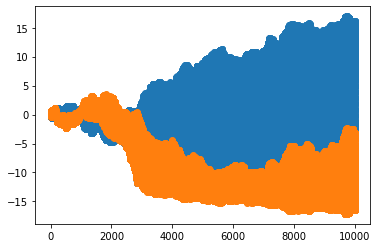

In [23]:
from matplotlib import pyplot as plt
for i in range(len(s2_features[2])):
    plt.plot(s2_features[2][i], "-o", color="C{}".format(s2_labels[i]), lw=0)

In [31]:
import numpy as np 

In [50]:
s2_features.shape

(100, 50, 10000)

In [53]:
s2_features[0,:25,:500].shape

(25, 500)

In [80]:
import seaborn as sns
#index = 11
for index in range(100):
    sns.histplot(np.concatenate(s2_features[index,:,50:300]), color="yellow", label="0")

    sns.histplot(np.concatenate(s2_features[index,:25,50:300]), color="blue", label="1")

    sns.histplot(np.concatenate(s2_features[index,26:,50:300]), color="red", label="2")
    plt.legend()
    plt.savefig("hist/{}.png".format(index))
    plt.close()


In [81]:
import os
import imageio
path = '/home/ucapzwe/generate_data/MLTSA_Dev/MLTSA/MLTSA/MLTSA_datasets/TwoD_pot/test/hist'
pic_lst = os.listdir(path)
pic_lst.sort(key = lambda x: int(x[:-4]))
gif_images = []
for name in pic_lst:
    filename = os.path.join(path, name)
    gif_images.append(imageio.imread(filename))  # 读取图片

imageio.mimsave('hist50_300.gif', gif_images, 'GIF', duration=0.8)

/tmp/ipykernel_781975/1325241679.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  gif_images.append(imageio.imread(filename))  # 读取图片


In [38]:
s2_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [75]:
index = 50

<AxesSubplot:ylabel='Density'>

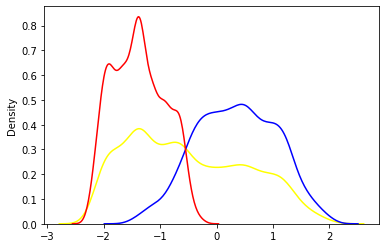

In [76]:

sns.kdeplot(np.concatenate(s2_features[index,:,50:300]), color="yellow", label="0")

sns.kdeplot(np.concatenate(s2_features[index,:25,50:300]), color="blue", label="1")

sns.kdeplot(np.concatenate(s2_features[index,26:,50:300]), color="red", label="2")

<AxesSubplot:ylabel='Count'>

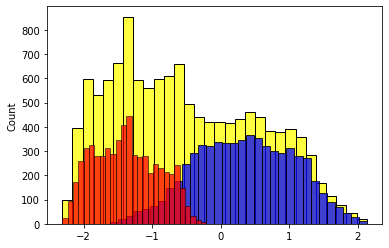

In [77]:
sns.histplot(np.concatenate(s2_features[index,:,50:300]), color="yellow", label="0")

sns.histplot(np.concatenate(s2_features[index,:25,50:300]), color="blue", label="1")

sns.histplot(np.concatenate(s2_features[index,26:,50:300]), color="red", label="2")

In [79]:
from scipy.special import kl_div

kl_div(s2_features[index,:25,50:300], s2_features[index,25:,50:300])

array([[inf, inf, inf, ..., inf, inf, inf],
       [inf, inf, inf, ..., inf, inf, inf],
       [inf, inf, inf, ..., inf, inf, inf],
       ...,
       [inf, inf, inf, ..., inf, inf, inf],
       [inf, inf, inf, ..., inf, inf, inf],
       [inf, inf, inf, ..., inf, inf, inf]])

In [173]:
temp_list = np.random.rand(100)
bins = np.linspace(start=np.min(temp_list), stop=np.max(temp_list), num=101, endpoint=True)
result = []
edgeIndex = 1
curr = 0
count = 0
#for i in sorted(temp_list):
while curr < len(temp_list):
    if sorted(temp_list)[curr] <= bins[edgeIndex]:
        count += 1
        curr += 1
    else:
        result.append(count)
        edgeIndex += 1
        count=0
        #print("Update first ptr")
if count > 0:
    result.append(count)
print(result)
print(sum(result))

[5, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 5, 0, 2, 1, 1, 2, 1, 1, 2, 6, 0, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 3, 0, 0, 0, 2, 1, 2, 4, 3, 1, 0, 1, 1, 1, 2, 0, 1, 2, 0, 1, 1, 1, 2, 1, 2, 0, 0, 1, 0, 2, 3, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 2, 0, 0, 1, 1, 1, 1, 2, 0, 0, 2, 1, 2, 3, 3]
100


In [1]:
import numba as nb
import numpy as np

def createBins(input, Nbins, lEdge = None, rEdge=None):
    temp_list = input
    if (lEdge and rEdge):
        start = lEdge
        end = rEdge
    else:
        start = np.min(temp_list)
        end = np.max(temp_list)
    bins = np.linspace(start=start, stop=end, num=Nbins, endpoint=True)
    return bins

@nb.njit()
def sortCount(input, bins):
    temp_list = sorted(input)
    result = []
    edgeIndex = 1
    curr = 0
    count = 0
    #for i in sorted(temp_list):
    while curr < len(temp_list):
        if temp_list[curr] <= bins[edgeIndex]:
            count += 1
            curr += 1
        else:
            result.append(count)
            edgeIndex += 1
            count=0
            #print("Update first ptr")
    if count > 0:
        result.append(count)
    #print(result)
    print(sum(result))
    return result

def nb_hist(input, Nbins, lEdge = None, rEdge = None):
    bins = createBins(input, Nbins, lEdge, rEdge)
    return sortCount(input, bins)

def hist(input, Nbins, lEdge = None, rEdge = None):
    temp_list = sorted(input)
    if (lEdge and rEdge):
        start = lEdge
        end = rEdge
    else:
        start = np.min(temp_list)
        end = np.max(temp_list)
    bins = np.linspace(start=start, stop=end, num=Nbins, endpoint=True)
    result = []
    edgeIndex = 1
    curr = 0
    count = 0
    #for i in sorted(temp_list):
    while curr < len(temp_list):
        if temp_list[curr] <= bins[edgeIndex]:
            count += 1
            curr += 1
        else:
            result.append(count)
            edgeIndex += 1
            count=0
            #print("Update first ptr")
    if count > 0:
        result.append(count)
    # Transfer the result to dict
    r_dict = {}
    for k, v in zip(bins[1:], result):
        r_dict[k] = v
    #print(result)
    print(sum(result))
    #print(r_dict)
    return result, r_dict

In [4]:
nb_hist(np.random.rand(10000), 10)

10000


[1100, 1116, 1130, 1076, 1115, 1135, 1099, 1154, 1075]

In [2]:
r, rd = hist(np.random.rand(10000), 10)

10000


In [3]:
test = np.random.rand(10)
print(test)

[0.19435034 0.56066533 0.93058481 0.33673533 0.1170207  0.56191478
 0.44504675 0.51044932 0.84271845 0.86112467]


In [5]:
createBins(test, 10)

array([0.1170207 , 0.20741671, 0.29781272, 0.38820873, 0.47860475,
       0.56900076, 0.65939677, 0.74979278, 0.84018879, 0.93058481])

In [7]:
 r, rd = hist(test, 10)

10


In [11]:
list(rd.keys())

[0.20741670953516306,
 0.29781272157626304,
 0.38820873361736297,
 0.47860474565846295,
 0.5690007576995629,
 0.6593967697406629,
 0.7497927817817629,
 0.8401887938228628,
 0.9305848058639627]

In [13]:
list(rd.values())

[2, 0, 1, 1, 3, 0, 0, 0, 3]

In [15]:
def prob(rd):
    # Get the total number of data points
    vals = list(rd.values())
    tot = sum(vals)
    assert tot != 0, "input error, sum of counts should be larger than zero"
    # Calculate the prob for vals/tot

    probs = [count/tot for count in vals]

    # Summarize into new prob dict
    pd = {}
    for key, prob in zip(list(rd.keys()), probs):
        pd[key] = prob
    
    return pd

In [16]:
prob(rd)

{0.20741670953516306: 0.2,
 0.29781272157626304: 0.0,
 0.38820873361736297: 0.1,
 0.47860474565846295: 0.1,
 0.5690007576995629: 0.3,
 0.6593967697406629: 0.0,
 0.7497927817817629: 0.0,
 0.8401887938228628: 0.0,
 0.9305848058639627: 0.3}